In [ ]:
import requests
import xmltodict
import pandas as pd

# url = "https://esploradati.istat.it/SDMXWS/rest/data/IT1,93_1227_DF_DCCN_TNA1_1,1.0/A.ITC12.B1G_B_W2_S1..Z.Z.V.N.B.2025M6" #Liguria, tutti gli ATECO
url = "https://esploradati.istat.it/SDMXWS/rest/data/IT1,93_1227_DF_DCCN_TNA1_1,1.0/A.ITF1+ITF2+ITF3+ITF4+ITF5+ITF6+ITG1+ITG2.B1G_B_W2_S1.C.Z.Z.V.N.B.2025M6"
headers = {"Accept": "application/vnd.sdmx.genericdata+xml;version=2.1"}  # oppure "application/xml"
response = requests.get(url, headers=headers)
data = xmltodict.parse(response.text)

In [46]:
url_csv = url
headers = {"Accept": "text/csv"}

response = requests.get(url_csv, headers=headers)

from io import StringIO
df = pd.read_csv(StringIO(response.text))
mappa_regioni = {
    'ITF1': 'Abruzzo',
    'ITF2': 'Molise',
    'ITF3': 'Campania',
    'ITF4': 'Puglia',
    'ITF5': 'Basilicata',
    'ITF6': 'Calabria',
    'ITG1': 'Sicilia',
    'ITG2': 'Sardegna'
}
df['REGIONE'] = df['REF_AREA'].map(mappa_regioni)

In [47]:
df[['REF_AREA', 'REGIONE','EDITION', 'BRKDW_INDUSTRY_NACE_REV2','TIME_PERIOD', 'OBS_VALUE']]

,REF_AREA,REGIONE,EDITION,BRKDW_INDUSTRY_NACE_REV2,TIME_PERIOD,OBS_VALUE
0,ITF1,Abruzzo,2025M6,C,1995,3517.2
1,ITF1,Abruzzo,2025M6,C,1996,3715.9
2,ITF1,Abruzzo,2025M6,C,1997,3867.7
3,ITF1,Abruzzo,2025M6,C,1998,4005.5
4,ITF1,Abruzzo,2025M6,C,1999,4294.7
...,...,...,...,...,...,...
219,ITG2,Sardegna,2025M6,C,2018,1677.6
220,ITG2,Sardegna,2025M6,C,2019,1786.5
221,ITG2,Sardegna,2025M6,C,2020,1293.7
222,ITG2,Sardegna,2025M6,C,2021,1700.1


In [ ]:
pivot_df  = df.pivot_table(
    index='TIME_PERIOD', 
    columns='REGIONE', 
    values='OBS_VALUE'
)
pivot_df

REGIONE,Abruzzo,Basilicata,Calabria,Campania,Molise,Puglia,Sardegna,Sicilia
TIME_PERIOD,,,,,,,,
1995,3517.2,1063.6,905.7,8298.9,568.1,5500.8,1811.8,5415.8
1996,3715.9,1193.3,939.5,8412.7,578.2,5547.5,1644.6,5830.5
1997,3867.7,1311.0,946.1,8991.8,694.2,5859.5,1839.3,5824.4
1998,4005.5,1335.6,971.6,9110.7,731.0,6321.3,1835.3,6319.5
1999,4294.7,1463.5,1044.9,9372.4,747.6,6464.3,1745.9,5715.6
2000,4687.1,1502.8,1150.2,9742.1,730.3,6725.4,1850.0,5865.9
2001,4869.4,1626.7,1245.0,10048.9,747.2,6863.6,1951.4,5802.3
2002,4942.1,1561.1,1332.8,10309.6,781.7,7110.9,2032.6,6056.9
2003,4760.3,1484.3,1267.3,9987.3,718.4,6976.2,2016.9,6080.4


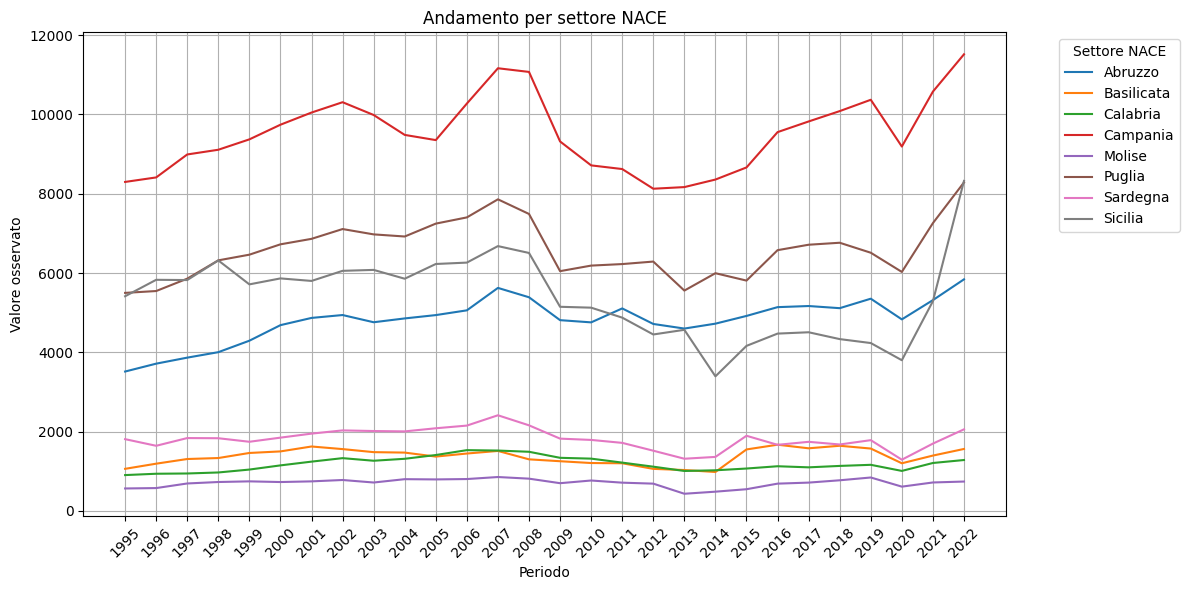

In [53]:
import matplotlib.pyplot as plt

# Ordina l'indice temporale se serve
pivot_df = pivot_df.sort_index()

# Grafico a linee
plt.figure(figsize=(12, 6))
for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], label=col)

plt.title('Andamento per settore NACE')
plt.xlabel('Periodo')
plt.ylabel('Valore osservato')
plt.legend(title='Settore NACE', bbox_to_anchor=(1.05, 1), loc='upper left')

# ✅ Correzione qui: usa pivot_df.index, non pivot.index
plt.xticks(ticks=pivot_df.index, labels=pivot_df.index, rotation=45)

plt.tight_layout()
plt.grid(True)
plt.show()



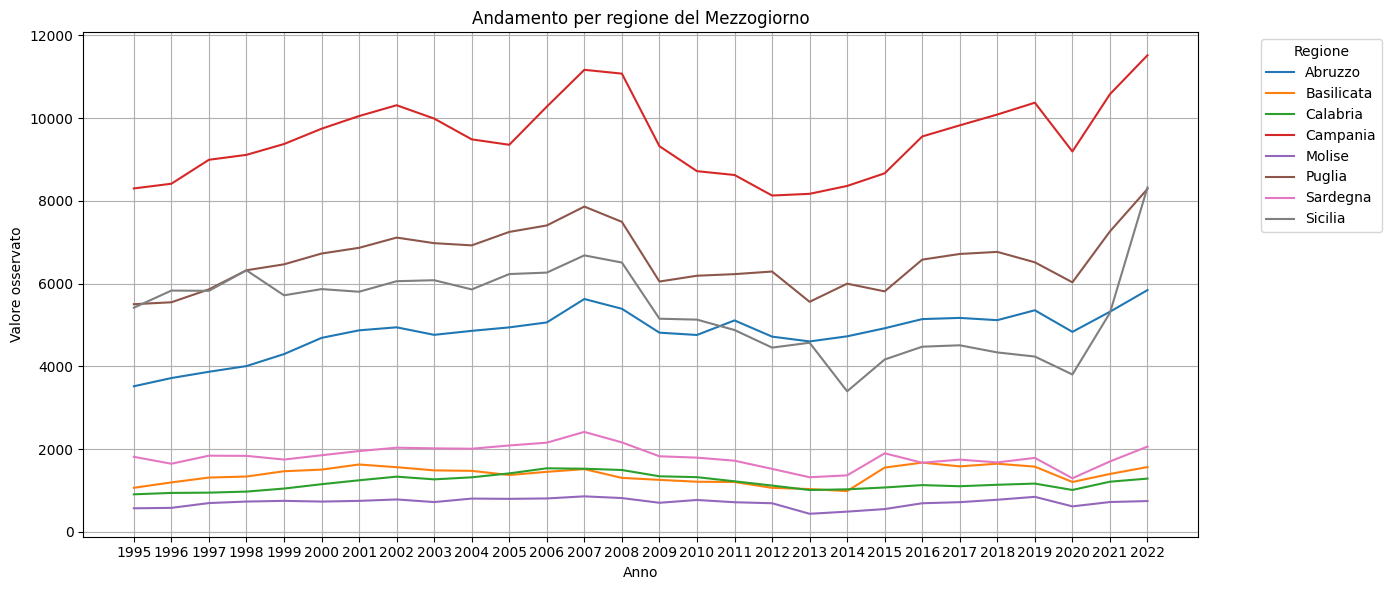

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], label=col)

plt.title('Andamento per regione del Mezzogiorno')
plt.xlabel('Anno')
plt.ylabel('Valore osservato')
plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tick corretti per asse X (anni interi)
plt.xticks(ticks=pivot_df.index, labels=pivot_df.index)

plt.tight_layout()
plt.grid(True)
plt.show()



## base 100

In [65]:
pivot_base = pivot_df[pivot_df.index >= 2010]

In [66]:
# Ricostruisci una nuova versione in base 2020 = 100
base_year = 2020
pivot_norm = pivot_base.divide(pivot_base.loc[base_year]) * 100


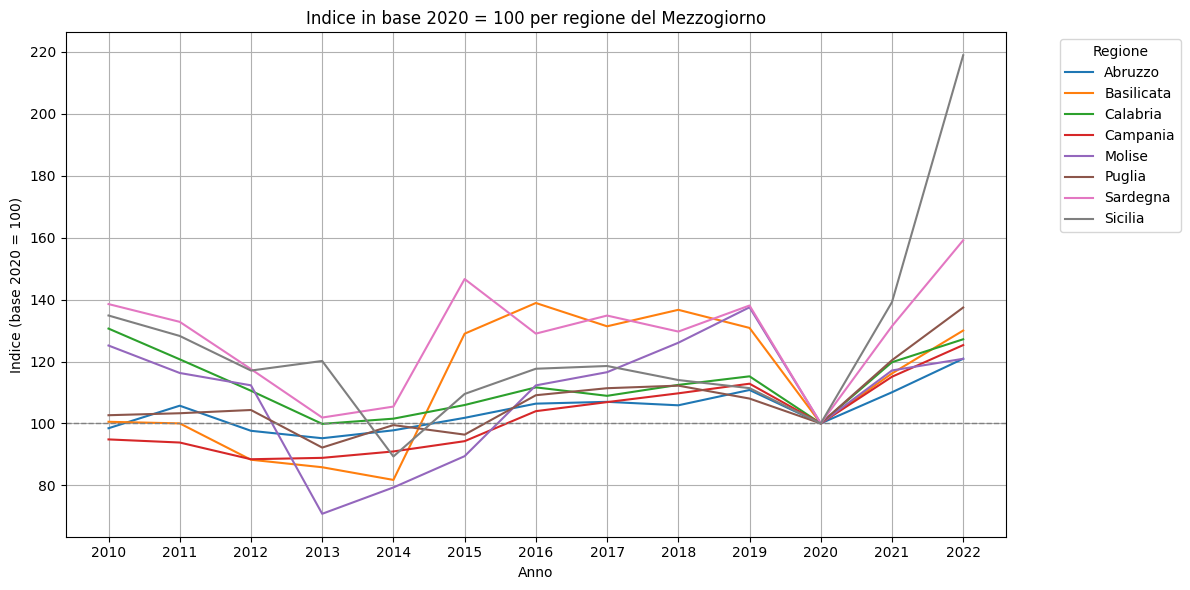

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for col in pivot_norm.columns:
    plt.plot(pivot_norm.index, pivot_norm[col], label=col)

plt.title('Indice in base 2020 = 100 per regione del Mezzogiorno')
# plt.xlabel('Anno')
plt.ylabel('Indice (base 2020 = 100)')
plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=pivot_norm.index, labels=pivot_norm.index)
plt.axhline(100, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.grid(True)
plt.show()
